In [1]:
! pip install kagglehub

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:01<00:00, 1.00MB/s]

Extracting files...


Path to dataset files: C:\Users\m8cg2\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


In [3]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('netflix_titles.csv')

# 2. Convert `date_added` to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 3. Extract year and month of addition
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 4. Clean `country`: select only the first listed country, fill missing as 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['first_country'] = df['country'].str.split(',').str[0].str.strip()

# 5. Handle missing `director` and `cast`
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown').str.split(',').str[:3].apply(lambda x: ', '.join(x))

# 6. Clean `duration`: split into numeric `duration_int` and `duration_type` (min or season)
def parse_duration(x):
    if pd.isna(x):
        return None, None
    parts = x.split()
    try:
        return int(parts[0]), parts[1]
    except:
        return None, None

df[['duration_int', 'duration_type']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))

# 7. Fill missing `rating` with 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

# 8. Final check
print("Sample Data After Cleaning:")
print(df[['date_added','year_added','month_added','first_country','director','cast','duration_int','duration_type','rating']].head())
print("\nMissing value summary:")
print(df[['date_added','country','director','cast','duration_int','duration_type','rating']].isnull().sum())


Sample Data After Cleaning:
  date_added  year_added  month_added  first_country         director  \
0 2021-09-25      2021.0          9.0  United States  Kirsten Johnson   
1 2021-09-24      2021.0          9.0   South Africa          Unknown   
2 2021-09-24      2021.0          9.0        Unknown  Julien Leclercq   
3 2021-09-24      2021.0          9.0        Unknown          Unknown   
4 2021-09-24      2021.0          9.0          India          Unknown   

                                         cast  duration_int duration_type  \
0                                     Unknown          90.0           min   
1    Ama Qamata,  Khosi Ngema,  Gail Mabalane           2.0       Seasons   
2  Sami Bouajila,  Tracy Gotoas,  Samuel Jouy           1.0        Season   
3                                     Unknown           1.0        Season   
4    Mayur More,  Jitendra Kumar,  Ranjan Raj           2.0       Seasons   

  rating  
0  PG-13  
1  TV-MA  
2  TV-MA  
3  TV-MA  
4  TV-MA  

Mis

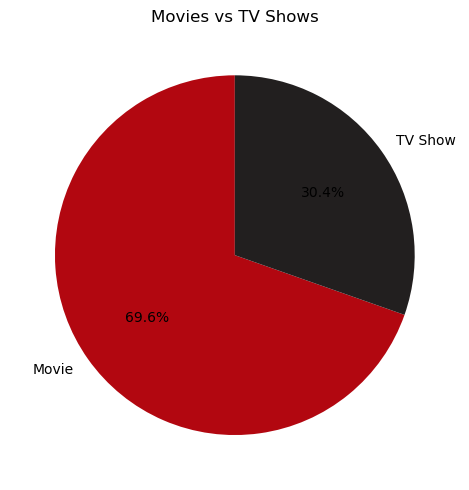

C:\Windows\Temp\ipykernel_24656\3466806760.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='magma')


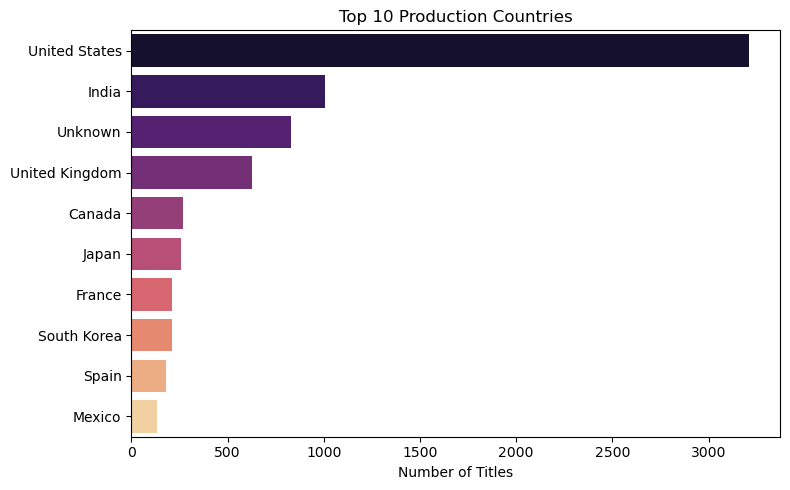

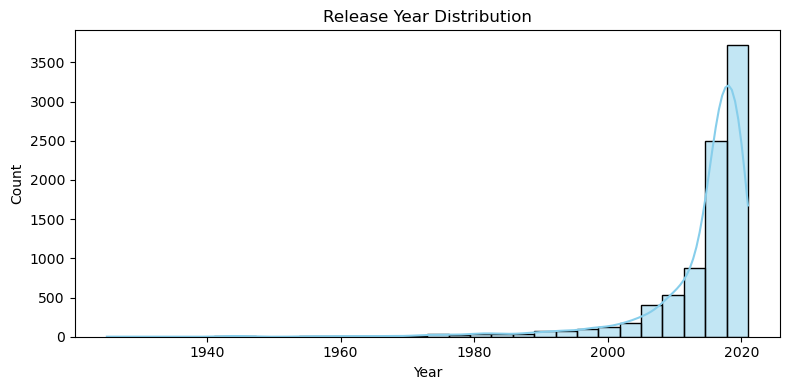

C:\Windows\Temp\ipykernel_24656\3466806760.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')


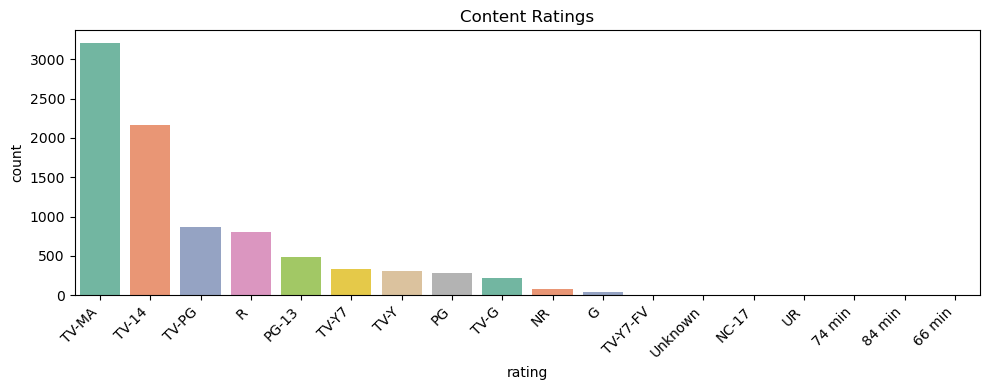

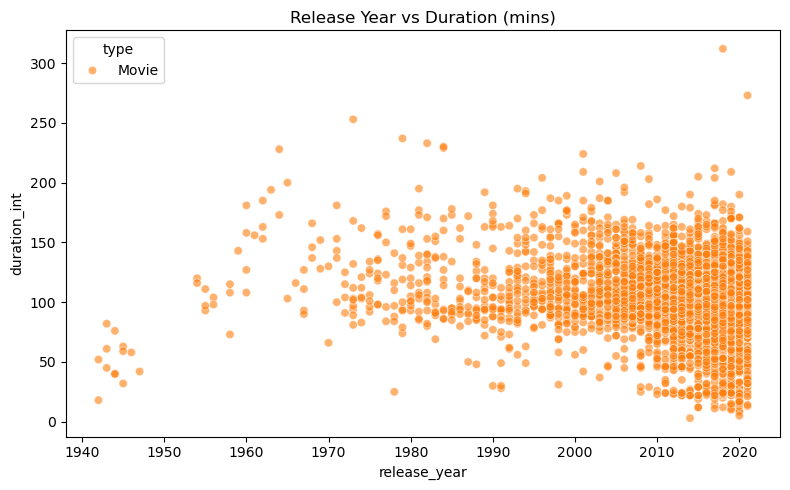

C:\Windows\Temp\ipykernel_24656\3466806760.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies, x='type', y='duration_int', palette='Set3')


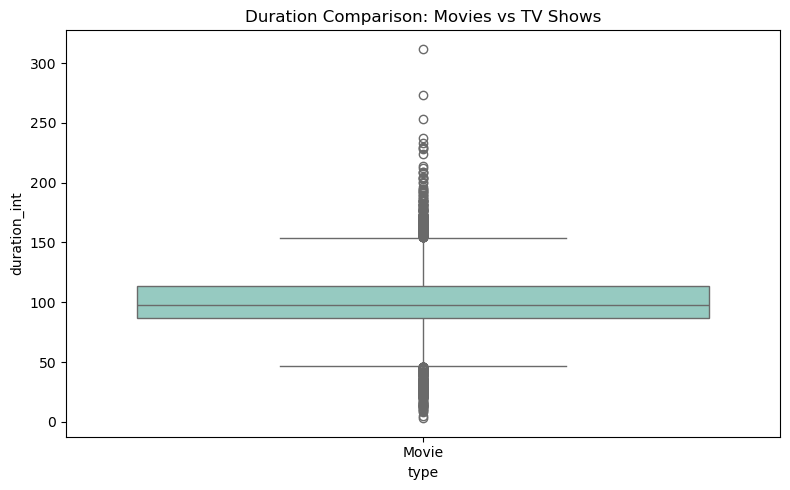

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1–6: Clean data (reuse your parse_duration etc.)
df = pd.read_csv('netflix_titles.csv')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'] = df['country'].fillna('Unknown')
df['first_country'] = df['country'].str.split(',').str[0].str.strip()
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown').str.split(',').str[:3].apply(lambda x: ', '.join(x))
def parse_duration(x):
    if pd.isna(x): return None, None
    parts = x.split()
    try: return int(parts[0]), parts[1]
    except: return None, None

df[['duration_int', 'duration_type']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))
df['rating'] = df['rating'].fillna('Unknown')

# Subset for movies only (min duration)
movies = df[df['duration_type'] == 'min'].dropna(subset=['duration_int'])

# 1. Pie Chart – Movies vs TV Shows
plt.figure(figsize=(5,5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#b20710','#221f1f'], startangle=90)
plt.title('Movies vs TV Shows')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Bar Chart – Top 10 Countries
top10 = df['first_country'].value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top10.values, y=top10.index, palette='magma')
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3. Histogram – Release Year Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# 4. Countplot – Ratings
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Scatter Plot – Year vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=movies,
    x='release_year',
    y='duration_int',
    hue='type',
    alpha=0.6,
    palette={'Movie':'#ff7f0e','TV Show':'#1f77b4'}
)
plt.title('Release Year vs Duration (mins)')
plt.tight_layout()
plt.show()

# 6. Box Plot – Duration Comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=movies, x='type', y='duration_int', palette='Set3')
plt.title('Duration Comparison: Movies vs TV Shows')
plt.tight_layout()
plt.show()


